# Happy or Sad

**Author:** Carlos Alfredo Hernández Alvarez

**Github:** [carloshdez522](https://github.com/carloshdez522?tab=repositories)

**ORCID:** [https://orcid.org/0009-0006-6749-1686](https://orcid.org/0009-0006-6749-1686)

 Convolutional neural networks (CNNs) are particularly suited for image classification tasks due to their ability to capture spatial features and patterns within visual data.

 ## Objective
 This project aims to demonstrate the potential of CNN's in image classification tasks. In this case, a prediction model based on a CNN has been developed to classify images of people into two categories: happy and sad.

### Loading data

First, the libraries needed to build and train the CNN using TensorFlow and Keras are imported. The libraries include TensorFlow for model building, NumPy for numerical operations, Matplotlib for visualization.

In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
data = tf.keras.utils.image_dataset_from_directory('Happy or Sad', batch_size=1)

Found 165 files belonging to 2 classes.


## Sample

A part of the dataset is displayed from the `sample` function, it receives two parameters: `where`, which by default is the dataset `data`, and `n`, the number of images to display (default 10).

### Initialize

In [7]:
def sample(where=data, n=10):
  plt.figure(figsize=(15, 10))
  count = 0
  for images, labels in where:
    num_images = min(n, images.shape[0])

    for i in range(num_images):
      if count >= n:
        break
      ax = plt.subplot(5, 5, count + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      class_name = 'Sad' if labels[i].numpy() == 1 else 'Happy'
      plt.title(class_name)
      plt.axis("off")
      count += 1
      if count >= n:
        break
  plt.show()

### Sample

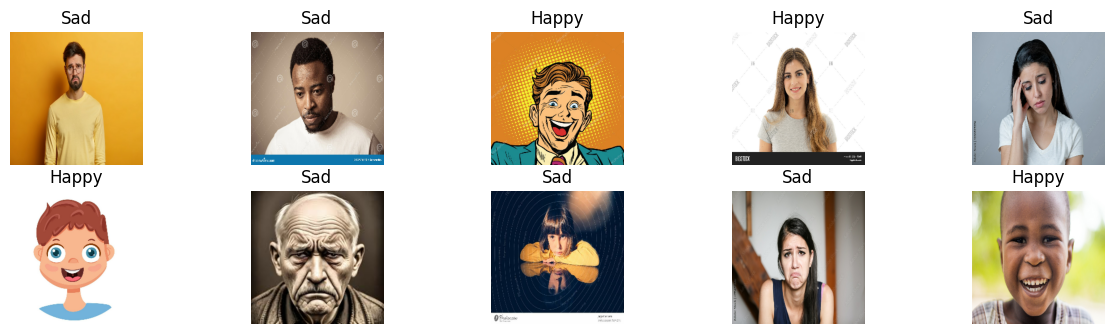

In [8]:
sample()

## Preparing data

The images in the `data` dataset are normalized by scaling the pixel values to be between 0 and 1. Then, the `split_data` function that splits a dataset into three subsets: training, validation and test. This function takes 70% of the data set for training (`data_train`), and then splits the remaining 30% in half to obtain the validation(`data_val`) and test(`data_test`) subsets.

### Normalize

In [9]:
data_noramlized = data.map(lambda x,y: (x/255, y))

### Split data

In [10]:
def split_data(dataset):
  train, temp = dataset.take(int(0.7 * len(dataset))), dataset.skip(int(0.7 * len(dataset)))
  val, test = temp.take(int(0.5 * len(temp))), temp.skip(int(0.5 * len(temp)))
  return train, val, test

In [11]:
data_train, data_val, data_test = split_data(data_noramlized.concatenate(data_noramlized))

## Model construction

The model is trained for classification. The `build_model` function creates the model using convolution, max-pooling, flattening and dense layers, and compiles it with the `adam` optimizer and the `BinaryCrossentropy` loss function, suitable for binary classification. The model is trained with 10 epochs using training and validation data, storing the training history in the `history` variable for analysis using the loss function and model accuracy.

### Network architecture

In [12]:
def build_model(info=False):
  model = Sequential()

  model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D())
  model.add(Conv2D(32, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(16, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

  if info:
    display(model.summary())

  return model

classification_model = build_model()

### Training

In [13]:
history = classification_model.fit(data_train, epochs=10, validation_data=data_val)

Epoch 1/10
230/230 [==============================] - 14s 38ms/step - loss: 0.8344 - accuracy: 0.4826 - val_loss: 0.6359 - val_accuracy: 0.7200
Epoch 2/10
230/230 [==============================] - 10s 44ms/step - loss: 0.6924 - accuracy: 0.6174 - val_loss: 0.6114 - val_accuracy: 0.7200
Epoch 3/10
230/230 [==============================] - 9s 38ms/step - loss: 0.6267 - accuracy: 0.7261 - val_loss: 0.4479 - val_accuracy: 0.8600
Epoch 4/10
230/230 [==============================] - 9s 38ms/step - loss: 0.4289 - accuracy: 0.8478 - val_loss: 0.2150 - val_accuracy: 0.9400
Epoch 5/10
230/230 [==============================] - 7s 29ms/step - loss: 0.2984 - accuracy: 0.9087 - val_loss: 0.2277 - val_accuracy: 0.9600
Epoch 6/10
230/230 [==============================] - 9s 37ms/step - loss: 0.1696 - accuracy: 0.9565 - val_loss: 0.0853 - val_accuracy: 1.0000
Epoch 7/10
230/230 [==============================] - 7s 28ms/step - loss: 0.1385 - accuracy: 0.9652 - val_loss: 0.0238 - val_accuracy: 1.00

### Metrics

### Initialize

In [14]:
def stadistics(hist):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(hist.history['loss'], color='teal', label='loss')
  plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
  plt.legend(loc="upper left")
  plt.title('Loss', fontsize=20)

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
  plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
  plt.title('Accuracy', fontsize=20)
  plt.legend(loc="upper left")

  plt.show()

#### Graphics

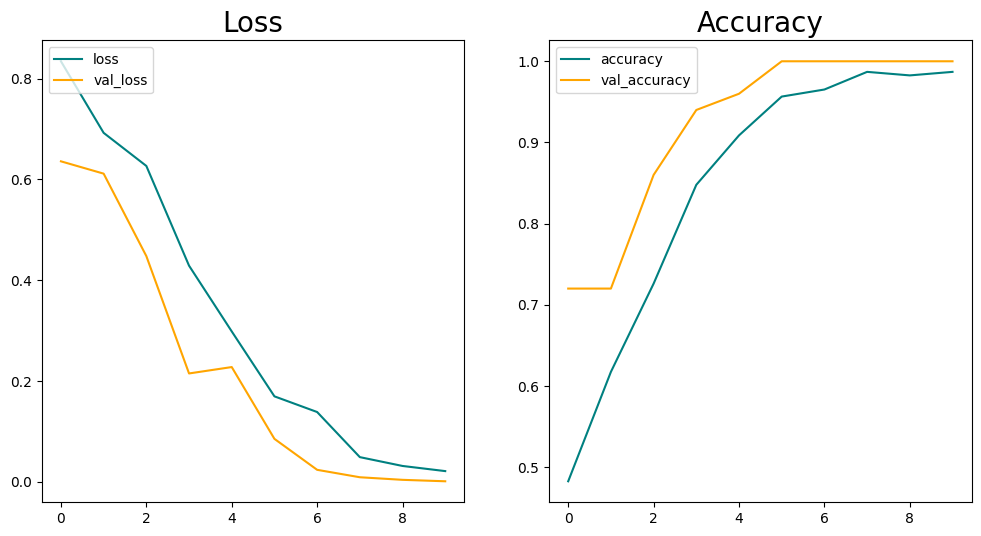

In [15]:
stadistics(history)

## Predictions

Predictions are made with the test data (`data_test`), some of these images and related metrics are shown.

### Initialize

In [20]:
def evaluation(dtest):
  from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
  import pandas as pd

  x_test = []
  y_test = []

  for images, labels in dtest:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())

  x_test = np.array(x_test)
  y_test = np.array(y_test)

  pred = classification_model.predict(x_test, verbose=False)
  y_pred = (pred > 0.5).astype(int)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)

  stadistics = {
    'Metrics': ['Accuracy', 'F1-score', 'Sensitivity','Specificity'],
    'Scores': [accuracy, f1, recall, specificity]
    }

  plt.figure(figsize=(15, 10))
  for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])

    class_name = 'Happy' if y_pred[i][0] == 0 else 'Sad'
    plt.title(class_name)
    plt.axis('off')
  plt.show()

  return pd.DataFrame(stadistics)

### Results

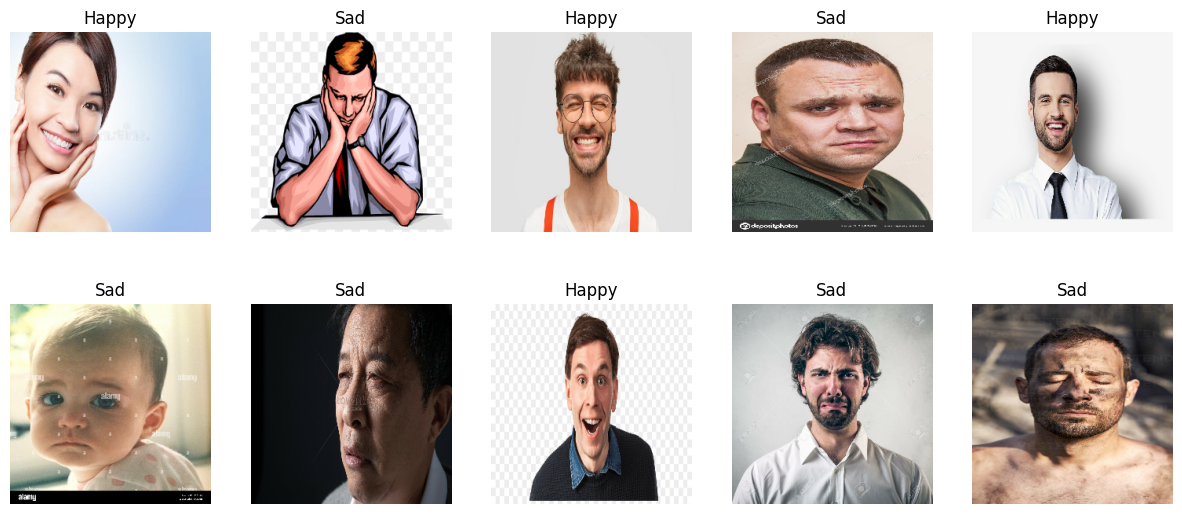

In [21]:
stats = evaluation(data_test)

In [22]:
stats

,Metrics,Scores
0,Accuracy,1.0
1,F1-score,1.0
2,Sensitivity,1.0
3,Specificity,1.0


## Conclusions
The "Happy or Sad" project successfully demonstrates the use of convolutional neural networks (CNNs) for image classification, in this case, identifying whether a person is happy or sad. CNNs have been shown to be very effective in capturing spatial features and patterns within visual data, making them ideal for image recognition and classification tasks.

The results obtained in terms of accuracy, F1-score, sensitivity and specificity indicate that the model is able to learn and generalize from the data provided. The implementation of normalization techniques and the proper partitioning of the data into training, validation and test sets are essential to achieve good model performance.
<br>

## Recommendations for project use

1. **Education and Training**:
   - **Didactic Material**: This project can be used as didactic material in courses and workshops on machine learning and computer vision. Students can learn about the construction and training of convolutional neural networks (CNNs) and experiment with different configurations and architectures.
   - **Research Projects**: Researchers can use this project as a starting point to explore and develop new techniques in emotion recognition, applying advanced methodologies and comparing results.

2. **Development of Practical Applications**:
   - **Mental Health Applications**: Integrate the model into mobile or desktop applications that monitor users' emotions, offering recommendations and resources for emotional well-being.
   - **Human-Computer Interaction**: Develop interactive systems that adapt their behavior according to the user's emotions, improving the user experience in games, virtual assistants and educational platforms.

3. **Sentiment Analysis in Media**:
   - **Social Networks and Digital Media**: Apply the model to analyze images in social networks and digital media, classifying emotions expressed in photos and videos. This can be useful for market research, trend monitoring and sentiment analysis.
   - **Advertising Campaigns**: Advertising agencies can use the model to evaluate the public's emotional reactions to different campaigns and adjust strategies in real time.

4. **Security and Monitoring Systems**:
   - **Real-Time Monitoring**: Implement the model in security systems to monitor the emotions of people in public or private spaces, identifying potentially dangerous situations or those requiring intervention.
   - **Customer Service**: Use emotion recognition in customer service centers to identify dissatisfied customers and take proactive measures to improve service.

5. **Social Interaction Improvements**:
   - **Social Robotics**: Integrate the model into social robots that interact with humans, improving the robots' ability to interpret and respond to human emotions appropriately.
   - **Communication Platforms**: Implement technology in videoconferencing and online communication platforms to detect and respond to participants' emotions, improving the quality of remote interactions.

6. **Innovations in Entertainment**:
   - **Games and Virtual Reality**: Use the model to create more immersive and personalized gaming experiences, where the game reacts to the player's emotions.
   - **Content Production**: Apply emotion recognition in the production of audiovisual content, adjusting the narrative and visual effects based on the emotional reactions of the audience.

These recommendations highlight how the "Happy or Sad" project can be applied in diverse industries and contexts, demonstrating the potential and versatility in the practical use of convolutional neural networks.